# Data Pre-Processing

### 1 - Data Cleaning

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


#### 1.1 - Column Renaming

In [2]:
# 1.1 - Rename Columns
df.rename(columns = {"No_Pation" : "Patients"}, inplace = True)
df.columns

Index(['ID', 'Patients', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

#### 1.2 - Unique values in Categarical column

In [3]:
# 1.2 - Check Unique Values in Categorical Columns
# ["Gender"] - Column
df["Gender"].unique()

array(['F', 'M', nan, 'f'], dtype=object)

In [4]:
# handling incorrect values
df["Gender"] = df["Gender"].replace({"F" : "Female", "M" : "Male", "f" : "Female"})
df["Gender"] = df["Gender"].fillna("Unknown")
df["Gender"].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [5]:
# ["CLASS"] - Column
df["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [6]:
#N (No diabetes), P (Pre-diabetes), Y (Yes, Diabetes)
df["CLASS"] = df["CLASS"].replace({"N" : "No diabetes", "N " : "No diabetes", "P" : "Pre-diabetes", "Y" : "Yes, Diabetes", "Y " : "Yes, Diabetes"})
df["CLASS"].unique()

array(['No diabetes', 'Pre-diabetes', 'Yes, Diabetes'], dtype=object)

#### 1.3 - Statistical Summary of Numerical Columns

In [7]:
# Statistical Summary of Numerical Columns
print(f"Statistical Summery for Each column\n")
for i in df.select_dtypes(include = "number").columns:
  print(f"----------- '{i}' column ---------------")
  print(f"Mean : {df[i].mean():.4f}")
  print(f"Median : {df[i].median():.4f}")
  print(f"Min : {df[i].min()}")
  print(f"Max : {df[i].max()}")
  print(f"Standard Deviation : {df[i].std():.4f}")
  print("\n")

Statistical Summery for Each column

----------- 'ID' column ---------------
Mean : 338.1665
Median : 294.0000
Min : 1
Max : 800
Standard Deviation : 239.4796


----------- 'Patients' column ---------------
Mean : 271746.7790
Median : 34399.0000
Min : 123
Max : 75435657
Standard Deviation : 3365681.2597


----------- 'AGE' column ---------------
Mean : 53.5962
Median : 55.0000
Min : 25.0
Max : 79.0
Standard Deviation : 8.7439


----------- 'Urea' column ---------------
Mean : 5.1330
Median : 4.6000
Min : 0.5
Max : 38.9
Standard Deviation : 2.9309


----------- 'Cr' column ---------------
Mean : 68.9384
Median : 60.0000
Min : 6.0
Max : 800.0
Standard Deviation : 59.8157


----------- 'HbA1c' column ---------------
Mean : 8.2814
Median : 8.0000
Min : 0.9
Max : 16.0
Standard Deviation : 2.5349


----------- 'Chol' column ---------------
Mean : 4.8625
Median : 4.8000
Min : 0.0
Max : 10.3
Standard Deviation : 1.2987


----------- 'TG' column ---------------
Mean : 2.3468
Median : 2.0000
Min

#### 1.4 - Box Plot of Numerical Columns

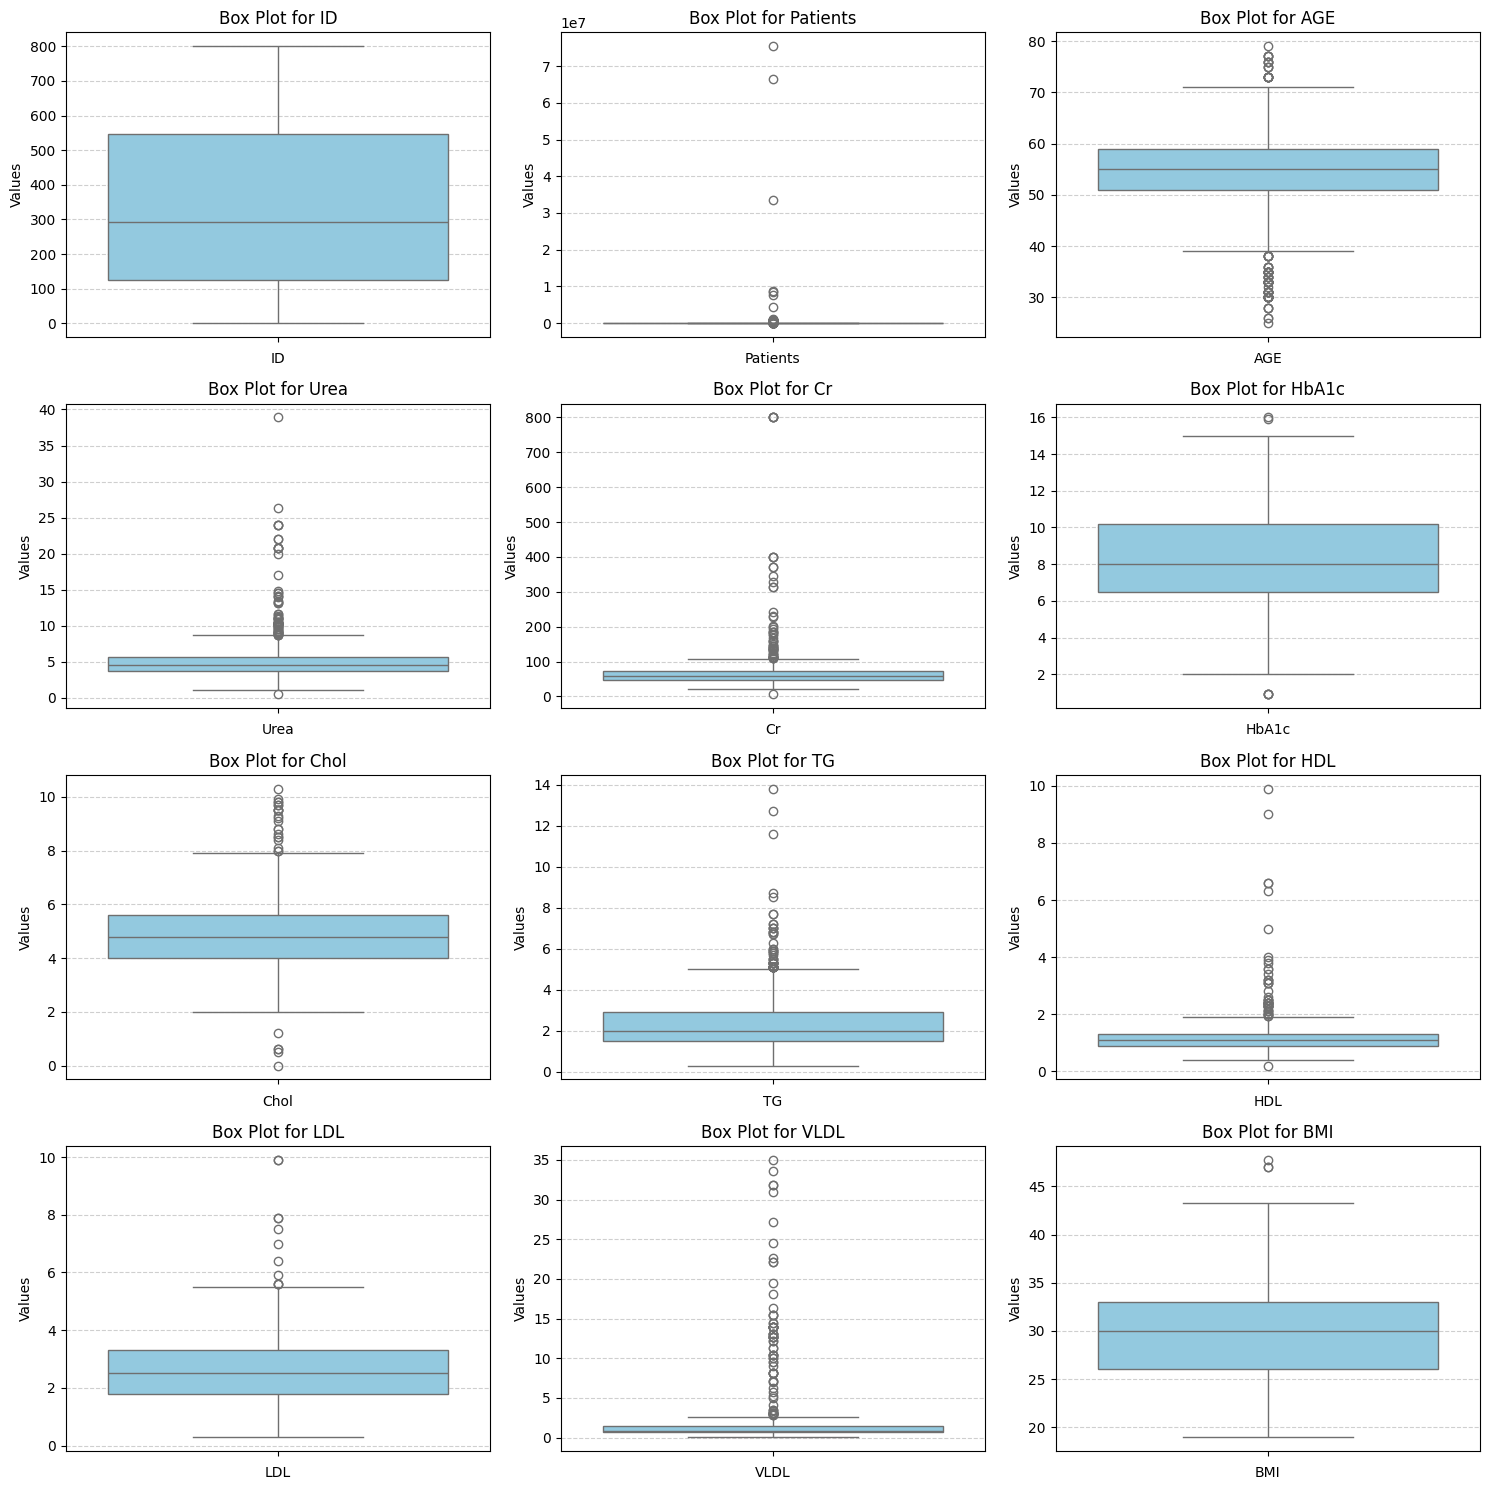

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for i, col in enumerate(df.select_dtypes(include="number").columns, start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[col], color="skyblue")
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### 1.5 - Identify Missing Values

In [9]:
# Identify Missing Values
df.isnull().sum()

,0
ID,0
Patients,0
Gender,0
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


#### 1.6 - Impute Missing Values

In [10]:
# Impute Missing Values by Median()
df["AGE"] = df["AGE"].fillna(df["AGE"].median())
df["AGE"].isnull().sum()

0

In [11]:
# Impute Missing Values
df["HbA1c"] = df["HbA1c"].fillna(df["HbA1c"].mean())
df["HbA1c"].isnull().sum()

0

In [12]:
# Impute Missing Values by Mean()
df["Urea"] = df["Urea"].fillna(df["Urea"].mean())
df["Urea"].isnull().sum()

0

In [13]:
# Impute Missing Values by Mode()
df["Cr"] = df["Cr"].fillna(df["Cr"].mode()[0])
df["Cr"].isnull().sum()

0

In [14]:
# Remaining columns Imputed By Median()
for i in df.columns[7: 12]:
  df[i] = df[i].fillna(df[i].median())
  print(f"{i} - \t", df[i].isnull().sum())

Chol - 	 0
TG - 	 0
HDL - 	 0
LDL - 	 0
VLDL - 	 0


In [15]:
df.isnull().sum()

,0
ID,0
Patients,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


#### 1.7 - Outlier Handling

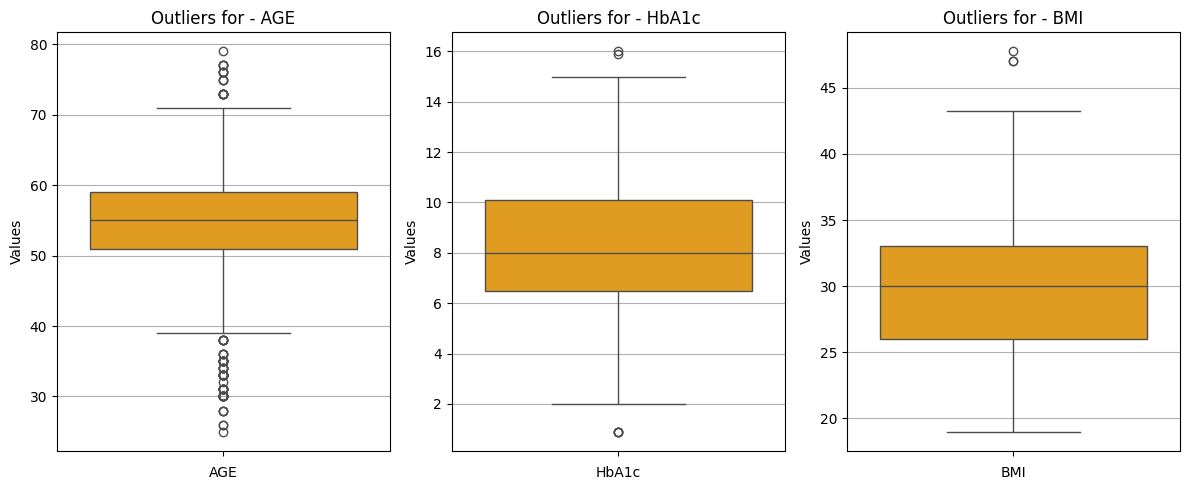

In [29]:
# a. Reatain Outliers
given_cols = ["AGE", "HbA1c", "BMI"]
plt.figure(figsize = (12, 5))
for i, col in enumerate(given_cols, start = 1):
  plt.subplot(1, 3, i)
  sns.boxplot(data = df[col], color = "Orange")
  plt.title(f"Outliers for - {col}")
  plt.xlabel(col)
  plt.ylabel("Values")
  plt.grid(axis = "y")

plt.tight_layout()
plt.show()


In [40]:
# b. Filter Outliers by using percentile threshhold
cr_th = df["Cr"].quantile(0.995)
urea_th = df["Urea"].quantile(0.999)
filtered_df = df[(df["Cr"] <= cr_th) & (df["Urea"] <= urea_th)]
print(f"Original Data Shape : {df.shape}")
print(f"Filtered Data Shape : {filtered_df.shape}")

Original Data Shape : (1009, 14)
Filtered Data Shape : (1003, 14)


In [47]:
# c. Remove Extreme Outliers for ()
out_rem_col = ["LDL", "VLDL", "HDL", "TG", "Chol"]
for i in out_rem_col:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  Lower_Bound = Q1 - 1.5 * IQR
  Upper_Bound = Q3 + 1.5 * IQR

  df = df[(df[i] >= Lower_Bound) & (df[i] <= Upper_Bound)]
print(df.shape)

(801, 14)


#### 1.8 Check for Duplicates

In [48]:
# Check for Duplicates:
df.duplicated().sum()

6

In [49]:
df[df.duplicated(keep = False)]

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
416,62,46059,Male,55.0,7.0,56.0,9.1,3.7,1.9,0.7,2.3,0.9,27.0,"Yes, Diabetes"
507,249,48822,Male,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,"Yes, Diabetes"
982,188,454316,Female,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,"Yes, Diabetes"
983,189,454316,Male,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,"Yes, Diabetes"
986,193,454316,Male,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,0.9,30.1,"Yes, Diabetes"
988,195,4543,Female,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,"Yes, Diabetes"
999,188,454316,Female,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,"Yes, Diabetes"
1000,189,454316,Male,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,"Yes, Diabetes"
1003,193,454316,Male,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,0.9,30.1,"Yes, Diabetes"
1005,195,4543,Female,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,"Yes, Diabetes"


In [51]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### 2 - Data Transformation

#### 2.1 - Feature Engineering

In [55]:
# Feature Engineering
df.select_dtypes(include = "O").columns
df["Gender"].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [64]:
# Convert Categarical column to Numerical Column
from sklearn.preprocessing import LabelEncoder
encoders_list = df.select_dtypes(include = "O").columns.to_list()
for i in encoders_list:
  obj = LabelEncoder()
  df[i] = obj.fit_transform(df[i])
df.head()

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,735,34221,1,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,504,34223,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,634,34224,0,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,721,34225,0,50.0,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,421,34227,1,48.0,4.7,47.0,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0


#### 2.2 - Feature Scaling

In [72]:
# Standerdization Scaler
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include = "number").columns.to_list()
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.describe()

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,7.950000e+02,795.000000,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,795.000000,7.950000e+02,795.000000
mean,8.937644e-18,0.000000,-4.133661e-17,-1.787529e-17,8.937644e-18,-4.468822e-18,3.575058e-17,1.787529e-17,8.937644e-18,-8.937644e-18,-4.468822e-18,0.000000,1.787529e-17,0.000000
std,1.000630e+00,1.000630,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630,1.000630e+00,1.000630
min,-1.403616e+00,-0.183488,-1.074489e+00,-3.336229e+00,-1.482596e+00,-9.873798e-01,-2.915366e+00,-2.542510e+00,-1.976812e+00,-2.272642e+00,-2.022956e+00,-2.068563,-2.152664e+00,-2.742942
25%,-8.720196e-01,-0.130416,-1.074489e+00,-3.118067e-01,-5.186627e-01,-3.433591e-01,-7.051870e-01,-7.104648e-01,-7.409511e-01,-6.804548e-01,-8.092129e-01,-0.651902,-6.735033e-01,0.421991
50%,-1.824382e-01,-0.107561,9.213489e-01,1.534891e-01,-1.868168e-01,-1.705731e-01,-6.222577e-02,2.235326e-02,-6.684529e-02,-4.357987e-02,-1.011961e-01,-0.179681,9.354729e-02,0.421991
75%,7.889535e-01,-0.083215,9.213489e-01,6.187848e-01,1.608313e-01,7.289812e-02,6.811982e-01,6.635691e-01,6.072605e-01,5.932950e-01,7.079659e-01,0.764760,8.056576e-01,0.421991
max,1.999457e+00,19.287121,2.917186e+00,2.945264e+00,1.065348e+01,1.148463e+01,3.112395e+00,2.587217e+00,2.629578e+00,2.503920e+00,2.933161e+00,2.417531,2.073510e+00,0.421991


In [75]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include = "number").columns.to_list()
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.describe()

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,0.412456,0.009424,0.269182,0.531120,0.122164,0.079168,0.483657,0.495642,0.429146,0.475790,0.408174,0.461106,0.509365,0.866667
std,0.294037,0.051392,0.250679,0.159298,0.082451,0.080230,0.166003,0.195065,0.217226,0.209487,0.201898,0.223051,0.236770,0.316161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.156211,0.002726,0.000000,0.481481,0.079427,0.051637,0.366667,0.357143,0.268293,0.333333,0.244898,0.315789,0.350000,1.000000
50%,0.358846,0.003900,0.500000,0.555556,0.106771,0.065491,0.473333,0.500000,0.414634,0.466667,0.387755,0.421053,0.531500,1.000000
75%,0.644291,0.005150,0.500000,0.629630,0.135417,0.085013,0.596667,0.625000,0.560976,0.600000,0.551020,0.631579,0.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
